In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("car details.csv")

print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.drop(columns=["name"], inplace=True)
df["year"] = df["year"].astype(int)
df["km_driven"] = df["km_driven"].astype(int)
df["selling_price"] = df["selling_price"].astype(float)

In [12]:
scaler = MinMaxScaler()
df["selling_price"] = scaler.fit_transform(df[["selling_price"]])

In [13]:
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["seller_type"] = le.fit_transform(df["seller_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["owner"] = le.fit_transform(df["owner"])

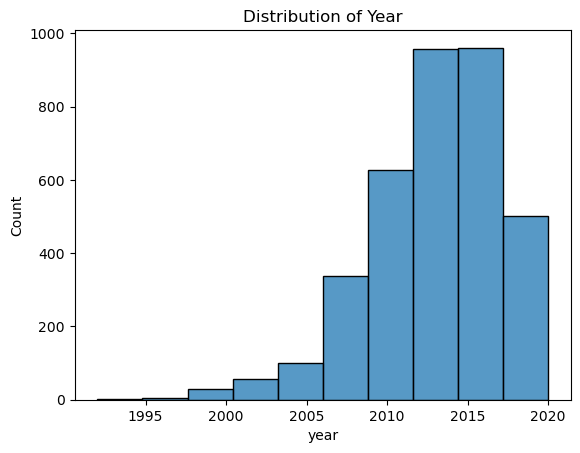

In [14]:
sns.histplot(df['year'], bins=10)
plt.title('Distribution of Year')
plt.show()

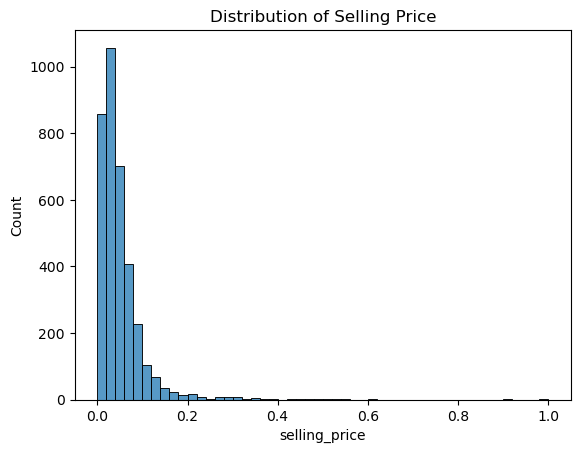

In [15]:
sns.histplot(df['selling_price'], bins=50)
plt.title('Distribution of Selling Price')
plt.show()

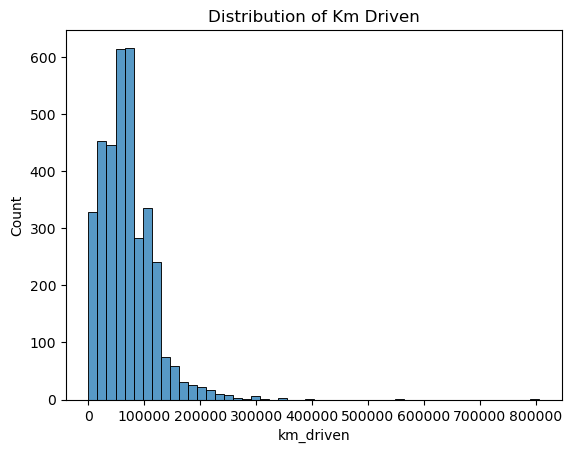

In [16]:
sns.histplot(df['km_driven'], bins=50)
plt.title('Distribution of Km Driven')
plt.show()

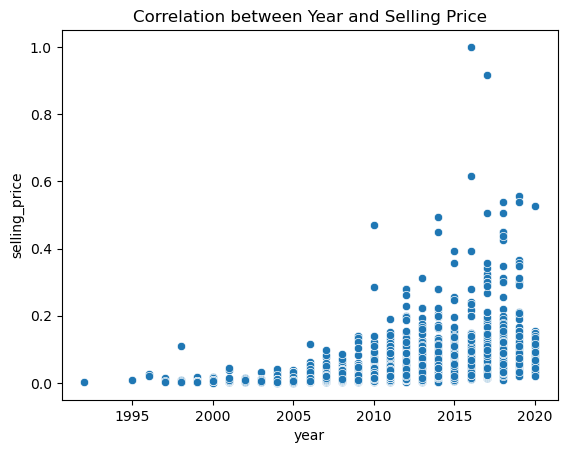

In [17]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Correlation between Year and Selling Price')
plt.show()

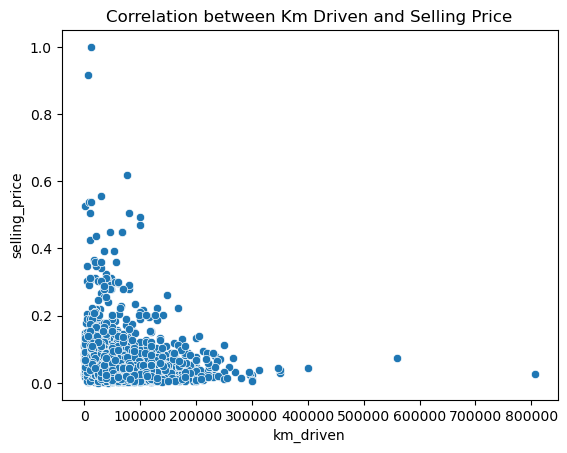

In [18]:
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Correlation between Km Driven and Selling Price')
plt.show()

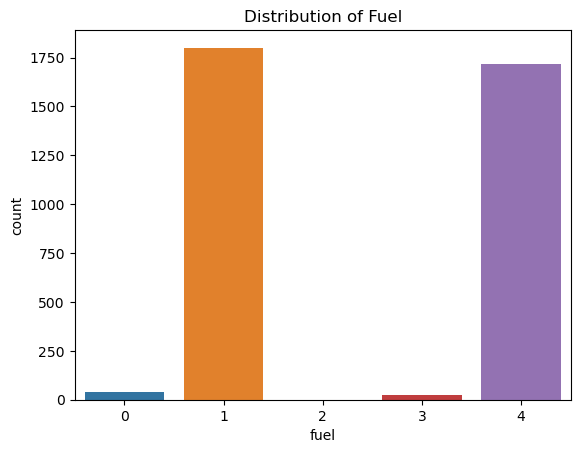

In [19]:
sns.countplot(x='fuel', data=df)
plt.title('Distribution of Fuel')
plt.show()

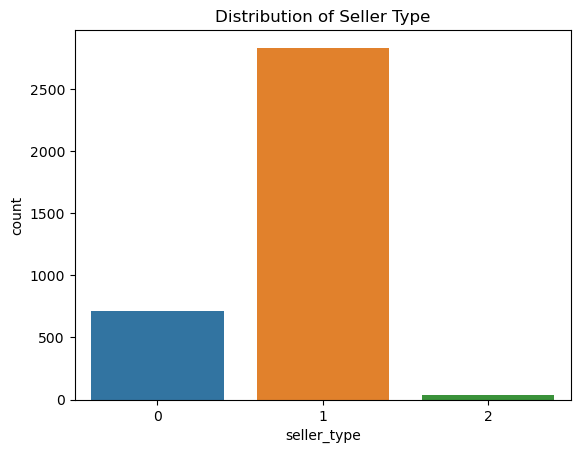

In [20]:
sns.countplot(x='seller_type', data=df)
plt.title('Distribution of Seller Type')
plt.show()

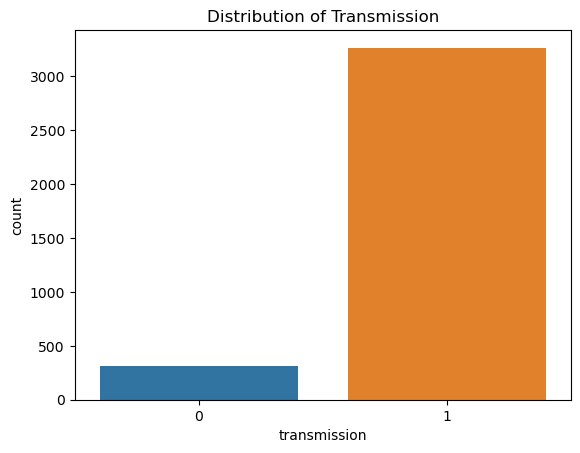

In [21]:
sns.countplot(x='transmission', data=df)
plt.title('Distribution of Transmission')
plt.show()

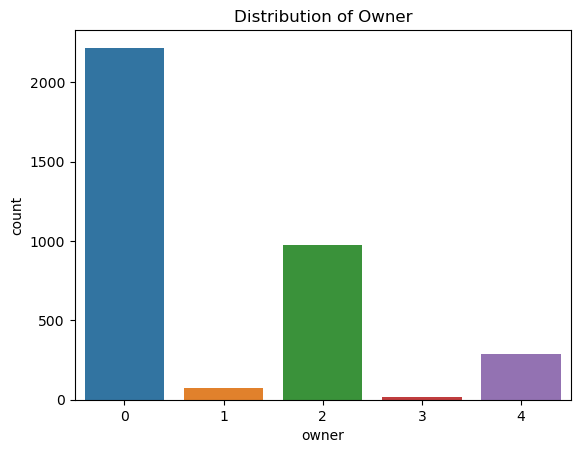

In [22]:
sns.countplot(x='owner', data=df)
plt.title('Distribution of Owner')
plt.show()

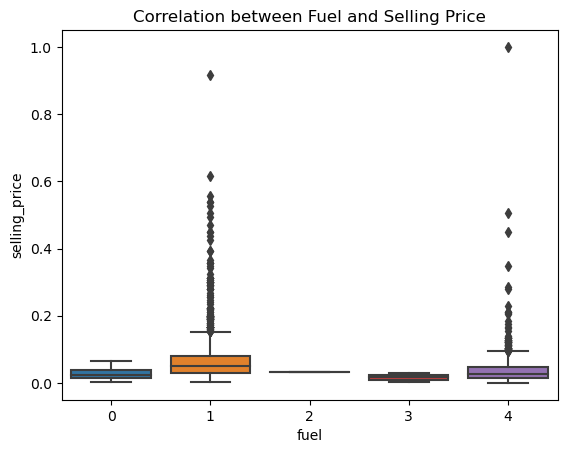

In [23]:
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Correlation between Fuel and Selling Price')
plt.show()

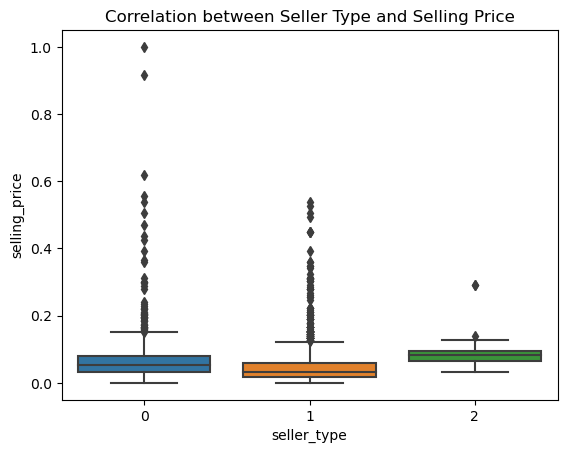

In [24]:
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.title('Correlation between Seller Type and Selling Price')
plt.show()

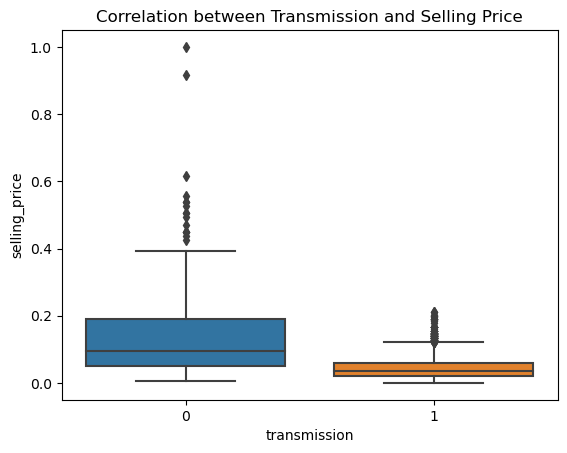

In [25]:
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Correlation between Transmission and Selling Price')
plt.show()

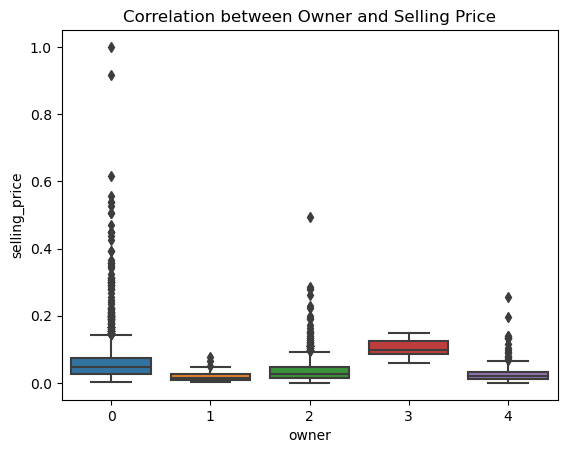

In [26]:
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Correlation between Owner and Selling Price')
plt.show()

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
names = ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
df = pd.read_csv("car details.csv")

In [69]:
df.drop(columns=["name"], inplace=True)

In [70]:
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["seller_type"] = le.fit_transform(df["seller_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["owner"] = le.fit_transform(df["owner"])

In [71]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=1)

In [75]:
X_subset = X_train.iloc[:20]
y_subset = y_train.iloc[:20]

In [79]:
X_subset_scaled = scaler.transform(X_subset)

y_pred_subset = model.predict(X_subset_scaled)

In [80]:
mse_subset = mean_squared_error(y_subset, y_pred_subset)
r2_subset = r2_score(y_subset, y_pred_subset)

In [81]:
print(f"Performance on subset data (20 data points):")
print(f"MSE: {mse_subset}")
print(f"R^2: {r2_subset}")

Performance on subset data (20 data points):
MSE: 0.171827947845805
R^2: 0.7701298356577859
